In [1]:
from matplotlib import pyplot as plt
from tqdm import tqdm
import SimpleITK as sitk
import glob
import numpy as np
from utils import (
    resample, get_segmented_lungs,
    load_itk, normalize_planes,
    window_image
)
from PIL import Image

In [2]:
INPUT_FOLDER = r'/data/HC1/*/303*'
file_list = glob.glob(INPUT_FOLDER)
print(len(file_list))
file_list.sort()

101


In [3]:
# file_list = list(filter(lambda k: 'PL061850842690412' in k, file_list))
# file_list

  0%|          | 0/1 [00:00<?, ?it/s]

3071 -3024
3775 -3679
int32
generated limits: 
-1350 150


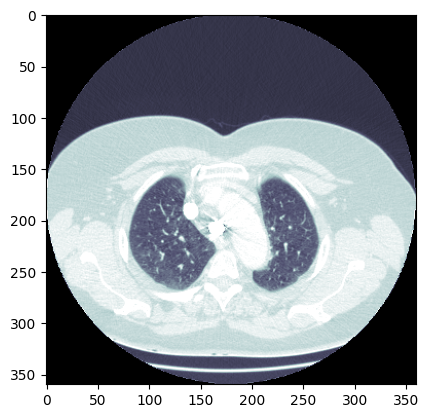

  0%|          | 0/1 [00:13<?, ?it/s]

150 -1350


NameError: name 'raw_name' is not defined

In [5]:
%%time
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import os
import matplotlib

for file in tqdm(file_list[0:1]):
    img, origin, spacing = load_itk(file)
    print(img.max(), img.min())
    img2, spacing2 = resample(img, spacing)
    print(img2.max(), img2.min())
    print(img2.dtype)
    img2 = window_image(img2, -600, 1500)

    # plt.imshow(img2[201,:,:], cmap=plt.cm.bone)
    # plt.show()
    # img2 = np.asarray(img2, dtype=np.uint8)
    # img3 = np.asarray([normalize_planes(im) for im in img2])
    # img3 = np.asarray([get_segmented_lungs(im) for im in img2])
    # print(img2.dtype)
    # raw_name = file.split('/')[3]

    plt.imshow(img2[201,:,:], cmap=plt.cm.bone)
    plt.show()

    print(img2.max(), img2.min())
    print(raw_name)
    
    # visualize generated masks
    # if not os.path.exists('/data/HC1-lung-segment-preview/' + raw_name + '.png'):
    #     p = img3.transpose(2, 1, 0)
    #     verts, faces, normals, values = measure.marching_cubes(p, 0)

    #     fig = plt.figure(figsize=(10, 10))
    #     ax = fig.add_subplot(111, projection='3d')

    #     mesh = Poly3DCollection(verts[faces], alpha=0.20)
    #     face_color = [0.45, 0.45, 0.75]
    #     mesh.set_facecolor(face_color)
    #     ax.add_collection3d(mesh)

    #     ax.set_xlim(0, p.shape[0])
    #     ax.set_ylim(0, p.shape[1])
    #     ax.set_zlim(0, p.shape[2])

    #     plt.savefig('/data/HC1-lung-segment-preview/' + raw_name + '.png')
    #     plt.close()
    #     matplotlib.use('Agg')

    ### saving masks
    # current_name = raw_name + '.nrrd'
    # if not os.path.exists(current_name):
    #     ma = sitk.GetImageFromArray(img3)
    #     sitk.WriteImage(
    #         ma,
    #         '/data/HC1-lung-segment/' + current_name, True
    #     )